In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
import numpy as np

In [2]:
sns.set_theme()

In [3]:
raw_data = pd.read_csv("../data/Electric_Vehicle_Charging_Station_Data.csv")

In [4]:
raw_data

,ObjectId2,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70189,70190,MUNICIPAL SC / 1100WALNUT1,1100 Walnut,Boulder,Colorado,80302,2023-08-31 09:20:52,MDT,2023-08-31 10:56:11,MDT,01:35:13,00:49:39,2.360,1.675,0.296,Level 2,70125
70190,70191,MUNICIPAL SC / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2023-08-31 09:24:16,MDT,2023-08-31 10:26:58,MDT,01:02:42,01:02:28,6.277,4.457,0.788,Level 2,70126
70191,70192,BOULDER / ATRIUM ST1,1770 13th St,Boulder,Colorado,80302,2023-08-31 09:39:36,MDT,2023-08-31 11:48:55,MDT,02:09:22,02:09:08,12.933,9.183,1.623,Level 2,70127
70192,70193,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,2023-08-31 09:41:08,MDT,2023-08-31 10:55:27,MDT,01:14:21,01:14:09,7.512,5.334,0.943,Level 2,70128


In [5]:
raw_data.describe()

,ObjectId2,Zip_Postal_Code,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,ObjectID
count,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000
mean,35097.500000,80302.573724,8.450916,5.258133,1.060591,35096.500000
std,20263.406735,1.108910,8.807785,5.919214,1.105376,20263.406735
min,1.000000,80301.000000,0.000000,0.000000,0.000000,0.000000
25%,17549.250000,80302.000000,2.842250,1.597000,0.357000,17548.250000
50%,35097.500000,80302.000000,6.240000,3.676500,0.783000,35096.500000
75%,52645.750000,80303.000000,11.373000,6.851000,1.427000,52644.750000
max,70194.000000,80305.000000,92.691000,65.811000,11.633000,70193.000000


In [6]:
raw_data.columns

Index(['ObjectId2', 'Station_Name', 'Address', 'City', 'State_Province',
       'Zip_Postal_Code', 'Start_Date___Time', 'Start_Time_Zone',
       'End_Date___Time', 'End_Time_Zone', 'Total_Duration__hh_mm_ss_',
       'Charging_Time__hh_mm_ss_', 'Energy__kWh_', 'GHG_Savings__kg_',
       'Gasoline_Savings__gallons_', 'Port_Type', 'ObjectID'],
      dtype='object')

In [7]:
raw_data["start_time"] = pd.to_datetime(raw_data['Start_Date___Time'].values, format='mixed')
raw_data["end_time"] = pd.to_datetime(raw_data['End_Date___Time'].values, format='mixed')

In [8]:
pd.to_datetime("2019-01-01")

Timestamp('2019-01-01 00:00:00')

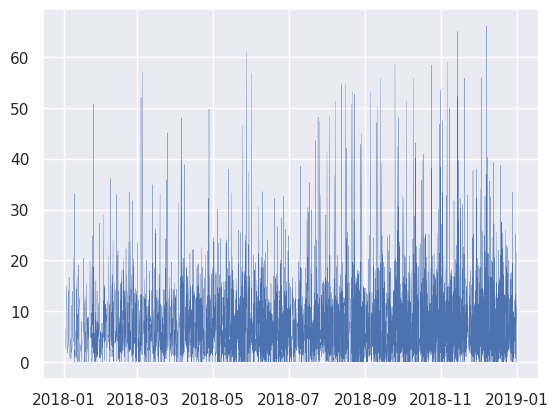

In [9]:
fig, ax = plt.subplots()

d = raw_data[raw_data["start_time"] < pd.to_datetime("2019-01-01")]
d = d.sort_values("start_time")

ax.plot(d.start_time, d["Energy__kWh_"], linewidth=.2)

In [10]:
data = pd.DataFrame()
data["hour"] = raw_data["start_time"].dt.hour
data["day"] = raw_data["start_time"].dt.dayofweek
data["kWh"] = raw_data["Energy__kWh_"]
data

,hour,day,kWh
0,17,0,6.504
1,8,1,2.481
2,21,1,15.046
3,9,2,6.947
4,14,2,1.800
...,...,...,...
70189,9,3,2.360
70190,9,3,6.277
70191,9,3,12.933
70192,9,3,7.512


In [11]:
# total kWh by hour and day
X = data.groupby(['day', 'hour'])['kWh'].sum().reset_index()
X["kWh_std"] = (X["kWh"] - X["kWh"].mean()) / X["kWh"].std()


X

,day,hour,kWh,kWh_std
0,0,0,391.062,-1.084352
1,0,1,85.372,-1.189920
2,0,2,100.186,-1.184804
3,0,3,117.754,-1.178737
4,0,4,83.503,-1.190566
...,...,...,...,...
163,6,19,2920.700,-0.210755
164,6,20,1582.041,-0.673053
165,6,21,1204.167,-0.803550
166,6,22,550.142,-1.029414


In [12]:
coords = {
    "hour": np.arange(24),
    "day": np.arange(7),
}

## Model: Hour of day

Given:
- $ \alpha $: Global intercept
- $ \beta_i $: Effect of the i-th hour of the day (for \( i = 1, 2, ..., 24 \))
- $ \mu $: Expected kWh charged for a given hour
- $ \sigma $: Standard deviation of the observations
- $ Y $: Observed kWh charged (standardized)

The model is represented as:

1. Prior on the intercept:
$$ \alpha \sim \mathcal{N}(0, 1) $$

2. Priors on the hourly effects:
$$ \beta_i \sim \mathcal{N}(0, 1) \quad \text{for} \quad i = 1, 2, ..., 24 $$

3. Prior on the standard deviation:
$$ \sigma \sim \text{HalfNormal}(1) $$

4. The linear model for the expected kWh charged:
$$ \mu = \alpha + \beta_{X_{\text{hour}}} $$

5. The likelihood of the observed data:
$$ Y \sim \mathcal{N}(\mu, \sigma) $$


In [13]:
with pm.Model(coords=coords) as model:
    alpha = pm.Normal("alpha", 0, 1)
    # hour of day
    beta = pm.Normal("beta", 0, 1, dims="hour")

    mu = alpha + beta[X.hour]
    sigma = pm.HalfNormal("sigma", 1)

    obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=X.kWh_std)

In [14]:
with model:
    ppred = pm.sample_prior_predictive()

Sampling: [Y_obs, alpha, beta, sigma]


In [15]:
ppred

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

Text(0, 0.5, 'Load (kWh)')

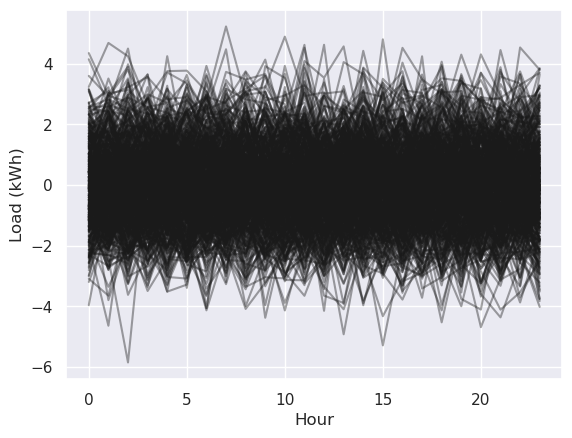

In [16]:
prior = ppred.prior
fig, ax = plt.subplots()
y = prior["alpha"] + prior["beta"]
ax.plot(coords["hour"], y.stack(sample=("chain", "draw")), c="k", alpha=0.4)

ax.set_xlabel("Hour")
ax.set_ylabel("Load (kWh)")

In [17]:
with model:
    idata = pm.sample(chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

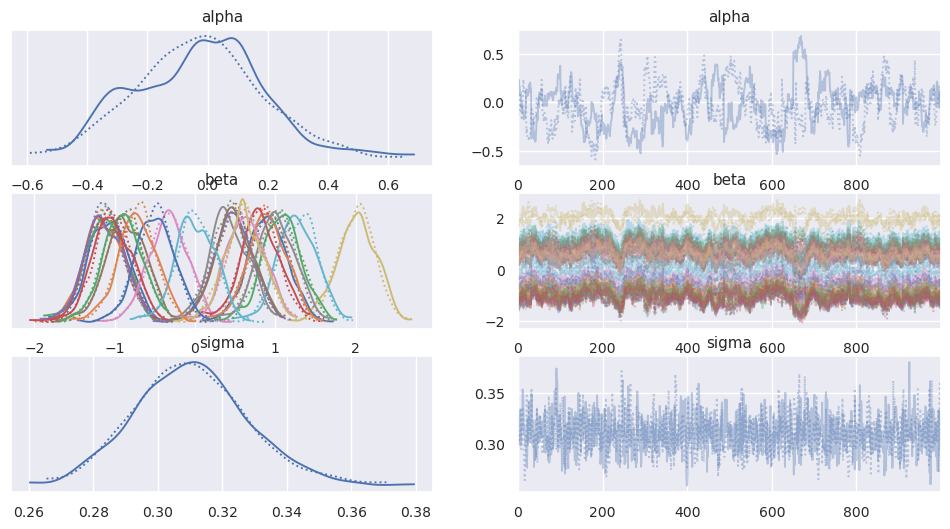

In [18]:
az.plot_trace(idata)

In [19]:
with model:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [Y_obs]


<Axes: >

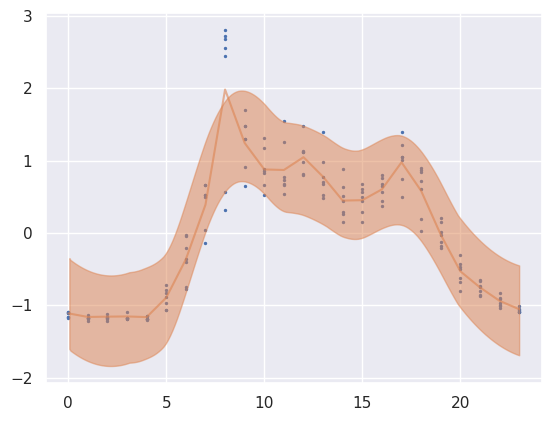

In [20]:
post = idata.posterior
mu_pp = post["alpha"] + post["beta"]

fig, ax = plt.subplots()

ax.plot(
    coords["hour"], mu_pp.mean(("chain", "draw")), label="Mean outcome", color="C1", alpha=0.6
)
ax.scatter(X.hour, X.kWh_std, s=2)
az.plot_hdi(X.hour, idata.posterior_predictive.Y_obs)

## Model: Hour of day + day of week

Given:
- $ \alpha $: Global intercept
- $ \beta_i $: Effect of the i-th hour of the day (for \( i = 1, 2, ..., 24 \))
- $ \gamma_j $: Effect of the j-th day of the week (for \( j = 1, 2, ..., 7 \))
- $ \mu $: Expected kWh charged for a given hour and day
- $ \sigma $: Standard deviation of the observations
- $ Y $: Observed kWh charged (standardized)

The model can be represented as:

1. Prior on the intercept:
$$ \alpha \sim \mathcal{N}(0, 1) $$

2. Prior on the hourly effects:
$$ \beta_i \sim \mathcal{N}(0, 1) \quad \text{for} \quad i = 1, 2, ..., 24 $$

3. Prior on the daily effects:
$$ \gamma_j \sim \mathcal{N}(0, 1) \quad \text{for} \quad j = 1, 2, ..., 7 $$

4. Prior on the standard deviation:
$$ \sigma \sim \text{HalfNormal}(1) $$

5. The linear model for the expected kWh charged given hour and day:
$$ \mu = \alpha + \beta_{X_{\text{hour}}} + \gamma_{X_{\text{day}}} $$

6. The likelihood of the observed data:
$$ Y \sim \mathcal{N}(\mu, \sigma) $$


In [21]:
with pm.Model(coords=coords) as model2:
    alpha = pm.Normal("alpha", 0, 1)
    # hour of day
    beta = pm.Normal("beta", 0, 1, dims="hour")
    # day of week
    gamma = pm.Normal("gamma", 0, 1, dims="day")
    
    mu = alpha + beta[X.hour] + gamma[X.day]
    sigma = pm.HalfNormal("sigma", 1)

    obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=X.kWh_std)

In [22]:
with model2:
    idata2 = pm.sample(chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta, gamma, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'gamma'}>,
        <Axes: title={'center': 'gamma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

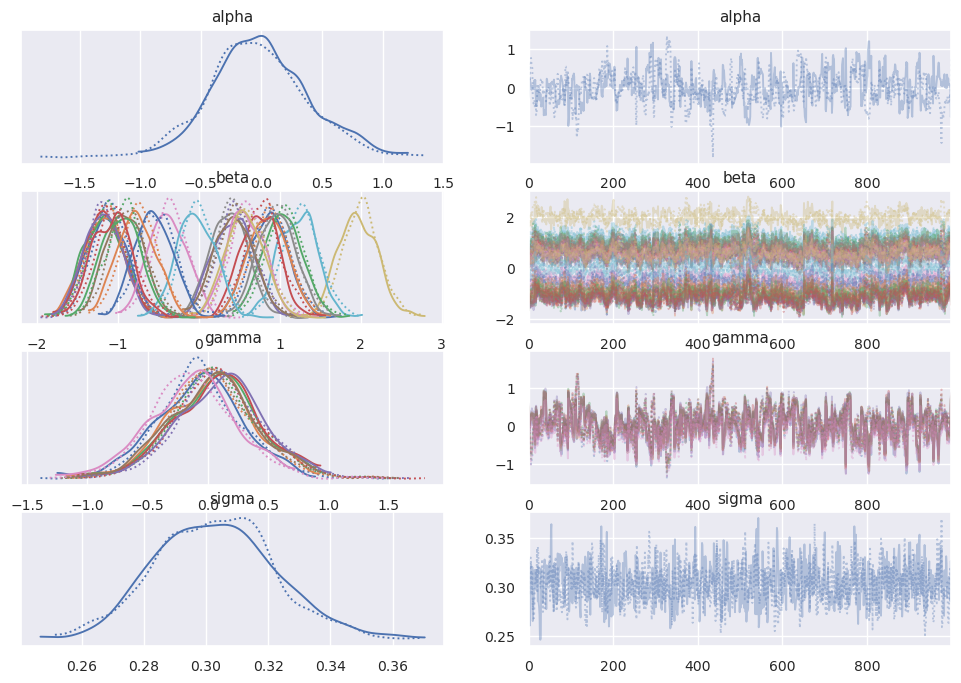

In [23]:
az.plot_trace(idata2)

In [24]:
with model2:
    pm.sample_posterior_predictive(idata2, extend_inferencedata=True)

Sampling: [Y_obs]


<Axes: xlabel='Y_obs / Y_obs'>

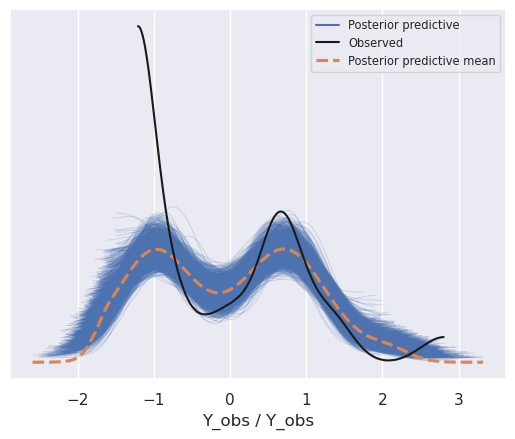

In [25]:
az.plot_ppc(idata2)

In [26]:
idata2.posterior_predictive.mean(("chain", "draw"))

<xarray.Dataset>
Dimensions:      (Y_obs_dim_2: 168)
Coordinates:
  * Y_obs_dim_2  (Y_obs_dim_2) int64 0 1 2 3 4 5 6 ... 162 163 164 165 166 167
Data variables:
    Y_obs        (Y_obs_dim_2) float64 -1.194 -1.244 -1.232 ... -1.088 -1.203